# ANN for Regression Problem

## Importing of All Necessary Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
import tensorflow as tf
import math
import logging
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib.font_manager').disabled = True

# Importing dataset
regression_df = pd.read_csv("Dataset/Regression/Range-Queries-Aggregates.csv")

C:\Users\liewy\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\liewy\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\liewy\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\liewy\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\pyth

## Defining the Function to Create Multilayer Perceptron

In [2]:
def multilayer_perceptron(input_d):
    # Task of neurons of first hidden layer
    layer_1 = tf.nn.relu(tf.add(tf.matmul(input_d, w1), b1))
    # Task of neurons of second hidden layer
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, w2), b2))
    # Task of neurons of output layer
    out_layer = tf.add(tf.matmul(layer_2, w3), b3)
    
    return out_layer

## Defining the Function to Generate RMSE for the ANN Model

In [3]:
def RegressionANN(Learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test):
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        total_batch = int(len(Y_train) / batch_size)
        # Training epoch
        for epoch in range(number_epochs):
            avg_cost = 0
            for i in range(total_batch):
                batch_x = X_train.iloc[i * batch_size:min(i * batch_size + batch_size, len(X_train)), :]
                batch_y = Y_train[i * batch_size:min(i * batch_size + batch_size, len(Y_train)), :]
                _, c = sess.run([optimizer, loss_op], {X: batch_x, Y: batch_y})
                avg_cost += c / total_batch

        # Test model
        pred = (neural_network) # Apply softmax to logits
        accuracy = tf.keras.losses.MSE(pred, Y)
        output=neural_network.eval({X: X_test})
        
        # Plotting of predictions made and target values
        plt.plot(Y_test[0: 100], "ro", output[0:100], 'bo')
        plt.title("Graph Representing Target and Predicted Value of Each Data Instance")
        plt.xlabel("Instances")
        plt.ylabel('Values')
        blue_o = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                              markersize=10, label='Prediction')
        red_o = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                              markersize=10, label='Target')

        plt.legend(handles=[blue_o, red_o])
        plt.show()

        rmse = mean_squared_error(Y_test, output, squared=False)
        print("RMSE: ", rmse)
        print(" ")
        return rmse

## Defining the Function to Find Best Configuration of Number of Layers in Layer 1 and 2

In [4]:
def Regression_Hyperparameter_Grid_Optimizer(X_train, Y_train, X_test, Y_test):
    
    # Settings of number of generations and offspring
    max_generation = 10
    no_of_offspring = 10
    
    # Variable to save best result of RMSE and parameter
    best_result_parameter = [0 , 0 ]
    best_result = 10000
    result_arr = [None]
    plot_result = [None , None , None]
    
    # For loop for generations in Grid Search Algorithm
    for i in range(max_generation):
        # For loop for offsprings within generation
        for j in range(no_of_offspring):
            # Print current progress
            print("Running generation: " , i + 1)
            print("Running offspring: ", j + 1)
            # Set number of n hidden nodes
            n_hidden1 = i + 1
            n_hidden2 = j + 1
            # Run ANN Function using the n hidden nodes given
            result = RegressionANN( learning_constant , number_epochs , batch_size , X_train, Y_train, X_test, Y_test)                
            # Save the result returned into an array
            result_arr = np.vstack([result_arr,result])
            plot_result = np.vstack([plot_result,[i + 1,j + 1,result]])
            # If result is better than previous best, new result is best result
            if(best_result > result):
                best_result = result
                best_result_parameter = [n_hidden1 , n_hidden2]
    # The best parameter for n hidden nodes will be used
    n_hidden1 = best_result_parameter[0]
    n_hidden2 = best_result_parameter[1]
    # Print the best parameter for n hidden nodes
    print("Best n_hidden1 is : ", n_hidden1)
    print("Best n_hidden2 is : ", n_hidden2)

## Defining the Function to Tune Hyperparameters of the ANN Model

In [5]:
def Regression_Hyperparameter_Optimizer(X_train, Y_train, X_test, Y_test):
    
    # Setting number of generations and offspring
    max_generation = 10
    no_of_offspring = 10

    # Variables to save best parameter and score among generations and offspring
    best_among_generation = [0 , 0 , 0]
    best_among_offspring = [0 , 0 , 0]
    best_result_generation = 10000
    best_result_offspring = 10000

    # pre-defining array of hyperparameters
    learning_constant_rand = np.random.normal(0.02,0.01,10)
    number_epochs_rand = np.random.normal(1000,50,10)
    batch_size_rand = np.random.normal(1000,50,10)
    
    # Make sure the variables are positive, number of epochs and batch size are of integer value
    learning_constant_rand = abs(learning_constant_rand)
    number_epochs_rand = abs(number_epochs_rand.astype(int))
    batch_size_rand = abs(batch_size_rand.astype(int))
    
    # Variable to save hyperparameters into an array
    best_hyperparameter_arr = [learning_constant_rand , number_epochs_rand , batch_size_rand]
    hyperparameter_arr = [learning_constant_rand , number_epochs_rand , batch_size_rand]
    result_arr = [None]
    
    # For loop for generations
    for i in range(max_generation): 
        # For loop for offsprings
        for j in range(no_of_offspring):
            
            # Run ANN Function
            result = RegressionANN( hyperparameter_arr[0][j] , hyperparameter_arr[1][j] , hyperparameter_arr[2][j] , X_train, Y_train, X_test, Y_test)                
            # Save returned result into an array
            result_arr = np.vstack([result_arr,result])
            # Find best result in current generation
            if(best_result_offspring > result):
                best_result_offspring = result
                best_among_offspring = [hyperparameter_arr[0][j] , hyperparameter_arr[1][j] , hyperparameter_arr[2][j]]

        # If current generation better than best generation, replace best generation
        if(best_result_generation > best_result_offspring):
            best_result_generation = best_result_offspring
            best_among_generation = best_among_offspring
            
            
        # Find mean and standard deviation of best generation's offspring
        learning_constant_mean = np.mean(best_hyperparameter_arr[0])
        learning_constant_std = np.std(best_hyperparameter_arr[0])
        number_epochs_mean = np.mean(best_hyperparameter_arr[1])
        number_epochs_std = np.std(best_hyperparameter_arr[1])
        batch_size_mean = np.mean(best_hyperparameter_arr[2])
        batch_size_std = np.std(best_hyperparameter_arr[2])
        
        # Generate new array of hyperparameters using mean and standard deviation of best generation's offspring
        learning_constant_rand = abs(np.random.normal(learning_constant_mean,learning_constant_std,10))
        number_epochs_rand = abs(np.random.normal(number_epochs_mean,number_epochs_std,10))
        batch_size_rand = abs(np.random.normal(batch_size_mean,batch_size_std,10))
        
        # Make sure the variables are positive, number of epochs and batch size are of integer value
        learning_constant_rand = abs(learning_constant_rand)
        number_epochs_rand = number_epochs_rand.astype(int)
        batch_size_rand = batch_size_rand.astype(int)

        # Compare best among generation result, if its first gen, best is first gen
        if(best_result_generation > best_result_offspring or i == 0):
            best_among_generation = best_among_offspring
            best_result_generation = best_result_offspring
            best_hyperparameter_arr = hyperparameter_arr
            
        # Save all hyperparameters into an array
        hyperparameter_arr = [learning_constant_rand , number_epochs_rand , batch_size_rand]
        # Print best hyperparameter and result
        print(best_hyperparameter_arr)
        print(best_result_generation)
        
        # Overwrite best hyperparameters
        learning_constant = best_among_generation[0]
        number_epochs = best_among_generation[1]
        batch_size = best_among_generation[2]
        
        print("Best learning constant is: ")
        print(learning_constant)
        print("Best number epochs is: ")
        print(number_epochs)
        print("Best batch size is: ")
        print(batch_size)

## Data Pre-processing and Data Splitting (Features, Target Values)

In [6]:
# Removing Nan from labels
regression_df = regression_df.drop(regression_df[regression_df.avg.apply(np.isnan)].index)

# Making data even number for better splitting of dataset into partitions
i = 0
while (len(regression_df) % 100 != 0):
    regression_df = regression_df.drop(labels = i, axis = 0)
    i += 1
    
# Shuffling of data
shuffled_data = regression_df.sample(frac = 1).reset_index(drop=True)

# Assigning of Features and Labels
data_X = pd.DataFrame(zscore(shuffled_data.iloc[:, range(1, 7)]))
data_Y = shuffled_data.iloc[:, 7]

## Declaration of Network and Learning Parameters

In [7]:
# Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 6
n_output = 1

# Learning parameters
learning_constant = 0.02
number_epochs = 1000
batch_size = 1000

# Defining the input and the output
X = tf.compat.v1.placeholder("float", [None, n_input])
Y = tf.compat.v1.placeholder("float", [None, n_output])

# Defining weights and biases

# Biases first hidden layer
b1 = tf.Variable(tf.ones([1]))
# Biases second hidden layer
b2 = tf.Variable(tf.ones([1]))
# Biases output layer
b3 = tf.Variable(tf.ones([1]))

# Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random.normal([n_input, n_hidden1]))
# Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2]))
# Weights conneting second hidden layer with output layer
w3 = tf.Variable(tf.random.normal([n_hidden2, n_output]))

## Initialization of Neural Network Model

In [8]:
# Create model
neural_network = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.compat.v1.reduce_mean(tf.keras.losses.MSE(neural_network, Y))

# loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network, labels=Y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)

# Initializing the variables
init = tf.compat.v1.global_variables_initializer()

## Splitting of Dataset into Training, Validation and Test Set

In [9]:
# Splitting into train, test and split data
# Split 10 parts by dividing length of dataset into 10 parts
partition_size = math.floor(len(data_Y) / 10)
# Declare empty arr to save result
final_result_arr = [0,0,0,0,0,0,0,0,0,0]

# Split test set
X_test = data_X.iloc[0: 1 * partition_size, 0:7]
Y_test = data_Y[0: 1 * partition_size]
# Split train set
X_train = data_X.drop(data_X.index[0: 1 * partition_size])
Y_train = data_Y.drop(data_Y.index[0: 1 * partition_size])
# Transpose data y
Y_train = np.transpose(np.asarray([Y_train]))
Y_test = np.transpose(np.asarray([Y_test]))

## Performing Hyperparamter Tuning of the ANN Model

Running generation:  1
Running offspring:  1


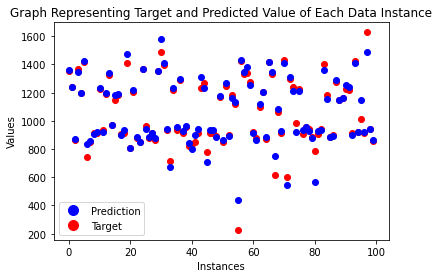

RMSE:  54.04969436592377
 
Running generation:  1
Running offspring:  2


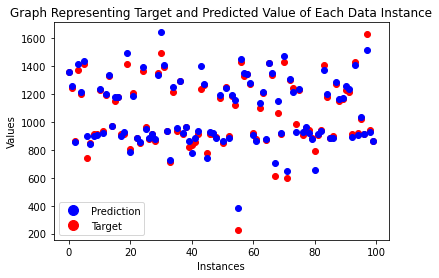

RMSE:  57.910253062158176
 
Running generation:  1
Running offspring:  3


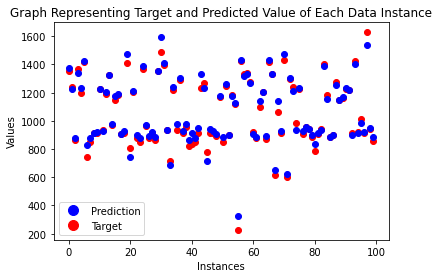

RMSE:  56.39024049925081
 
Running generation:  1
Running offspring:  4


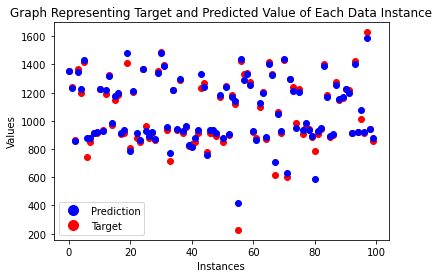

RMSE:  57.2054599622039
 
Running generation:  1
Running offspring:  5


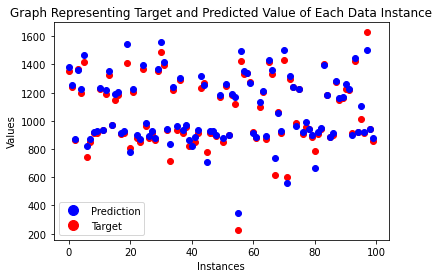

RMSE:  59.374494840080466
 
Running generation:  1
Running offspring:  6


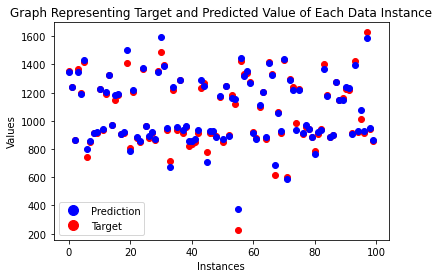

RMSE:  53.459808411149666
 
Running generation:  1
Running offspring:  7


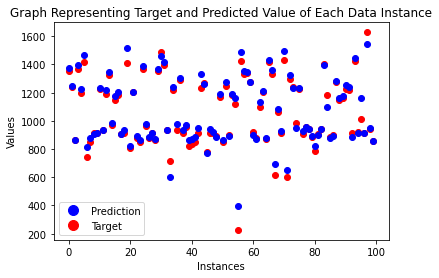

RMSE:  54.66091287675654
 
Running generation:  1
Running offspring:  8


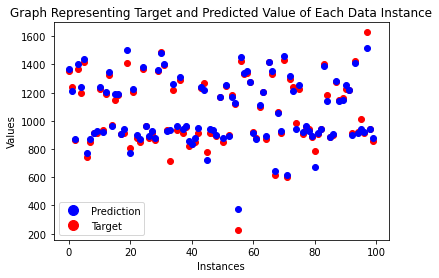

RMSE:  59.81613447352226
 
Running generation:  1
Running offspring:  9


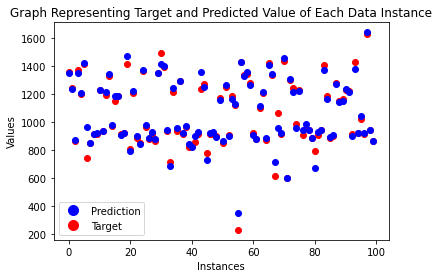

RMSE:  57.40828458306254
 
Running generation:  1
Running offspring:  10


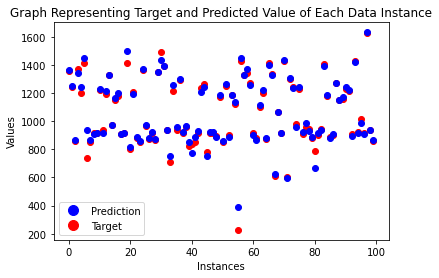

RMSE:  52.783605212134425
 
Running generation:  2
Running offspring:  1


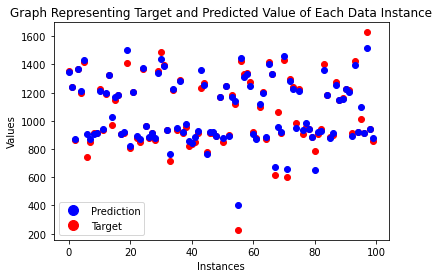

RMSE:  59.0343003357971
 
Running generation:  2
Running offspring:  2


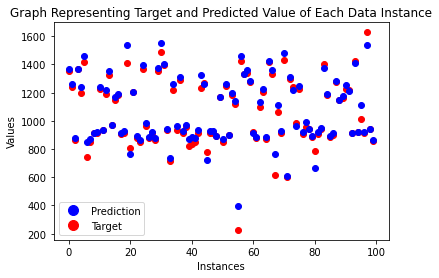

RMSE:  54.228978406071434
 
Running generation:  2
Running offspring:  3


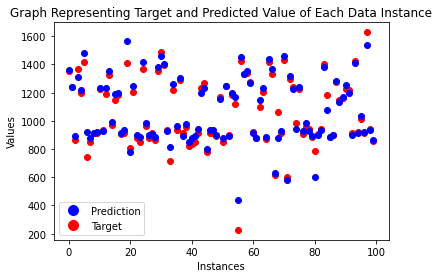

RMSE:  61.546474417362234
 
Running generation:  2
Running offspring:  4


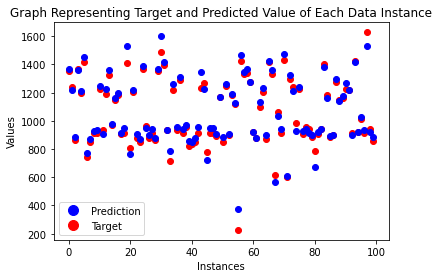

RMSE:  58.903075160603784
 
Running generation:  2
Running offspring:  5


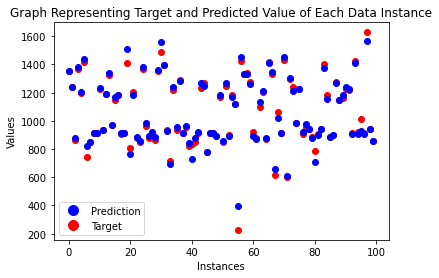

RMSE:  54.710180113210185
 
Running generation:  2
Running offspring:  6


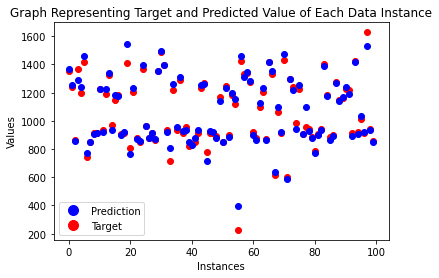

RMSE:  56.49338560103571
 
Running generation:  2
Running offspring:  7


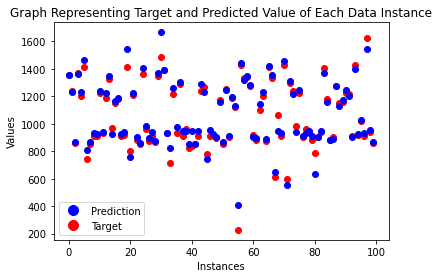

RMSE:  61.91120890929711
 
Running generation:  2
Running offspring:  8


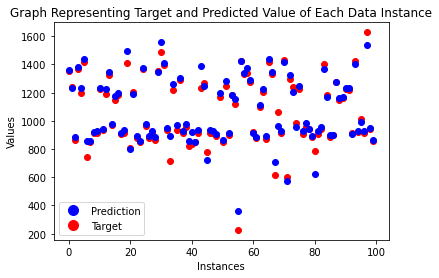

RMSE:  58.050861005223794
 
Running generation:  2
Running offspring:  9


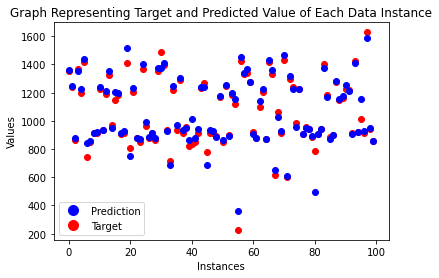

RMSE:  61.075012208055206
 
Running generation:  2
Running offspring:  10


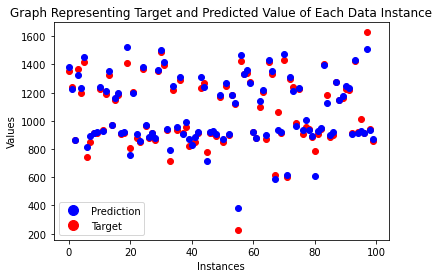

RMSE:  58.712630632111356
 
Running generation:  3
Running offspring:  1


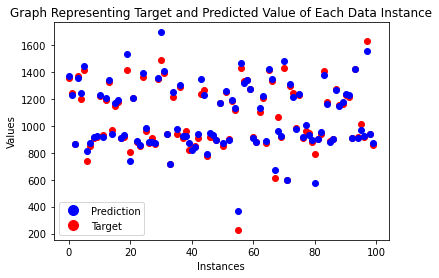

RMSE:  60.06498336270631
 
Running generation:  3
Running offspring:  2


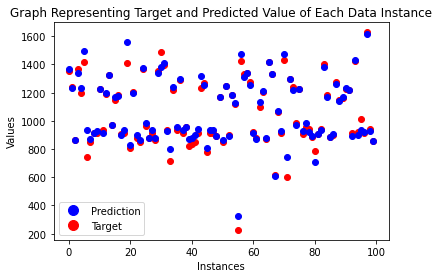

RMSE:  57.75471614567807
 
Running generation:  3
Running offspring:  3


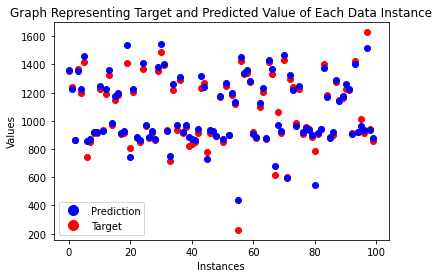

RMSE:  59.34510130095142
 
Running generation:  3
Running offspring:  4


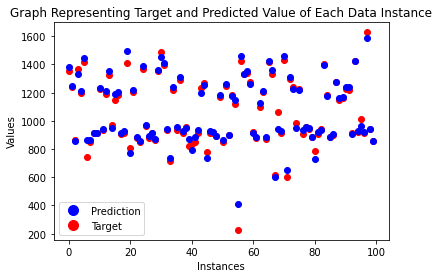

RMSE:  52.41003174120575
 
Running generation:  3
Running offspring:  5


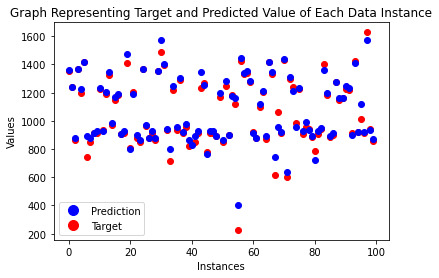

RMSE:  54.4442982492183
 
Running generation:  3
Running offspring:  6


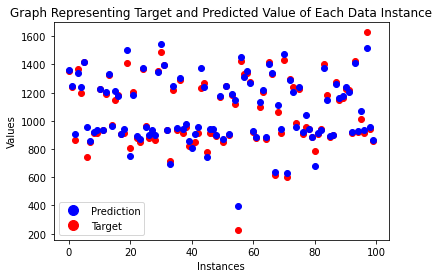

RMSE:  57.18600515398561
 
Running generation:  3
Running offspring:  7


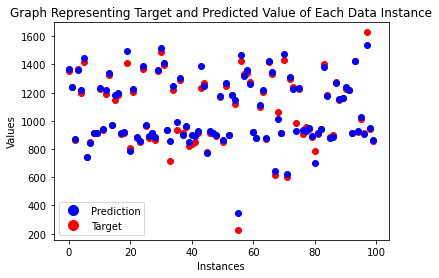

RMSE:  55.70375011742726
 
Running generation:  3
Running offspring:  8


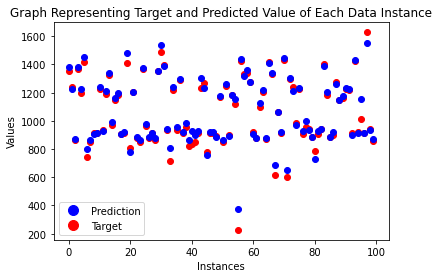

RMSE:  53.87471652468828
 
Running generation:  3
Running offspring:  9


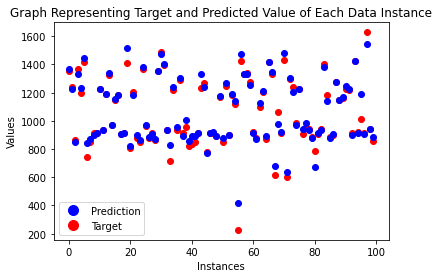

RMSE:  56.47960754825784
 
Running generation:  3
Running offspring:  10


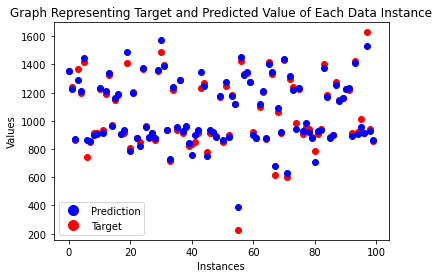

RMSE:  56.0312531305507
 
Running generation:  4
Running offspring:  1


In [ ]:
# Grid Search for n hidden nodes
Regression_Hyperparameter_Grid_Optimizer(X_train, Y_train, X_test, Y_test)
# Stochastic gradent descent for others
Regression_Hyperparameter_Optimizer(X_train, Y_train, X_test, Y_test)


# 10 fold Cross Validation
for i in range(0,10):
    # Print fold progress
    print("Running fold: ", i + 1)
    
    # Split test set
    X_test = data_X.iloc[i * partition_size: (i + 1) * partition_size, 0:7]
    Y_test = data_Y[i * partition_size: (i + 1) * partition_size]
    # Split train set
    X_train = data_X.drop(data_X.index[i * partition_size: (i + 1) * partition_size])
    Y_train = data_Y.drop(data_Y.index[i * partition_size: (i + 1) * partition_size])
    # Transpose data y
    Y_train = np.transpose(np.asarray([Y_train]))
    Y_test = np.transpose(np.asarray([Y_test]))
    # Run ANN Function using the best parameters tuned
    final_result_arr[i] = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
    

# Print result for each fold
print("Result for each fold is: ")
print(final_result_arr)

## Comparing Various Loss Functions and Optimizers

In [ ]:
neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.MeanAbsoluteError()(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Mean Absolute Error: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.MeanAbsolutePercentageError()(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Mean Absolute Percentage Error: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.MeanSquaredLogarithmicError()(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Mean Squared Logarithmic Error: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Softmax Cross Entropy: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.Poisson()(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Poisson: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.cosine_similarity(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Cosine Similarity: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.MeanAbsoluteError()(neural_network, Y)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("ADAM Optimizer: ", result)

neural_network = multilayer_perceptron(X)
loss_op = tf.keras.losses.MeanAbsoluteError()(neural_network, Y)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)
init=tf.global_variables_initializer()
result = RegressionANN(learning_constant, number_epochs, batch_size, X_train, Y_train, X_test, Y_test)
print("Gradient Descent Optimizer: ", result)